# Exploratory and Regression Analysis and Visualization of the Open Exoplanet Catalogue
In this notebook we will explore the Open Exoplanet Catalogue dataset using numpy, pandas, matplotlib, seaborn and other
python libraries. A description of this dataset can be found at
https://www.kaggle.com/mrisdal/open-exoplanet-catalogue and https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue. This is a database of all discovered extra-solar planets in csv format. The filename of the dataset is 'oec.csv'. It includes the characteristics of all discovered exoplanets (as well as planets in our own solar system). Data fields (columns) include planet and host star attributes, discovery methods, and date of discovery, such as:
* **PeriodDays**: The orbital period (how long it takes the planet to orbit its host star once), measured in days, of the planet around the host star or binary (double) star system.
* **PlanetaryMassJpt**: The mass of the planet in Jupiter masses, where 1 Jupiter mass is 1.8991766e+27 kg.
* **RadiusJpt**: The physical radius of the planet in Jupiter radii where 1 Jupiter radius is 69911000 m.
* **SurfaceTempK**: The surface temperature of the planet (units: Kelvins).
* **SemiMajorAxisAU**: The semi-major axis of a planet (essentially the average distance between the planet and the host star, but a more precise and detailed description here: https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) in Astronomical Units (AU), which is roughly the average distance between the Earth and Sun (149597870700 meters, or about 150 million kilometers (https://en.wikipedia.org/wiki/Astronomical_unit).
* **Eccentricity**: The orbital eccentricity of the planet around its host star. The orbital eccentricity of an astronomical object is a parameter that determines the amount by which its orbit around another body deviates from a perfect circle. A value of 0 is a circular orbit, values between 0 and 1 form an elliptical orbit, 1 is a parabolic escape orbit, and greater than 1 is a hyperbola (https://en.wikipedia.org/wiki/Orbital_eccentricity).
* **HostStarMassSlrMass**: The mass of the host star in solar masses, where 1 solar mass is 1.9891e+30 kg
* **HostStarRadiusSlrRad**: The physical radius of the host star in solar radii, where 1 solar radius is 6.96e+08 m.
* **HostStarMetallicity**: The stellar metallicity of the host star, which is fraction of mass of the host star that is not in hydrogen or helium (see https://en.wikipedia.org/wiki/Metallicity).
* **HostStarTempK**: The equilibrium temperature of the host star in Kelvins.
* **HostStarAgeGyr**: The age of the host star in giga-years.
* **DistFromSunParsec**: The distance of the planet from the sun in units of parsecs, where a parsec is equal to about 3.26 light-years (31 trillion kilometers or 19 trillion miles) in length (see https://en.wikipedia.org/wiki/Parsec).

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (10, 6)})
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot') # setting the plot style
%matplotlib inline
from __future__ import print_function, unicode_literals, division

# ignore various warnings
import warnings
warnings.filterwarnings('ignore')

We use the **read_csv** function in pandas to load and read the dataset
The **read_csv** function points to where the file is.

In [6]:
planetData = pd.read_csv('oec.csv')

When you read something using a pd.read_csv you create a a DataFrame.


A DataFrame in pandas is a two-dimensional, labeled data structure that resembles a table, where data is organized in rows and columns. Each column can hold a different data type (e.g., integers, floats, strings), similar to an Excel spreadsheet or SQL table. The labels of the rows are called index, while the column labels are referred to as column names. DataFrames are highly versatile and support a wide range of operations, such as filtering, aggregating, and merging, making them a central data structure for data manipulation and analysis in pandas.

# Using basics panda functions

In pandas, the **head()** function is used to display the first few rows of a DataFrame or Series. By default, it returns the first 5 rows, but you can specify the number of rows to display by passing an integer as an argument (e.g., df.head(10) for the first 10 rows).
It's particularly useful for quickly inspecting the top portion of large datasets to understand their structure or verify data loading.


In [7]:
planetData.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
0,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
1,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
2,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
3,Kepler-9 b,0,0.2500,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,...,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN
4,Kepler-9 c,0,0.1700,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,...,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN


In pandas, both shape and info() are methods or attributes used to get structural information about a DataFrame:

**shape:**
This attribute returns the dimensions of the DataFrame in the form of a tuple (number of rows, number of columns).

**info():**

This method provides a summary of the DataFrame, including:
Number of non-null entries per column.
Data types of each column.
Memory usage.
It’s especially useful for a quick overview of data completeness (e.g., if there are any missing values) and for checking the types of data you're working with.

In [8]:
print("Number of observations (rows):",planetData.shape[0] )
print("Number of features (columns):",planetData.shape[1] )
print(planetData.shape)
print(planetData.info())

Number of observations (rows): 3426
Number of features (columns): 24
(3426, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3426 non-null   object 
 1   TypeFlag              3426 non-null   int64  
 2   PlanetaryMassJpt      1176 non-null   float64
 3   RadiusJpt             2670 non-null   float64
 4   PeriodDays            3341 non-null   float64
 5   SemiMajorAxisAU       1271 non-null   float64
 6   Eccentricity          1003 non-null   float64
 7   PeriastronDeg         295 non-null    float64
 8   LongitudeDeg          39 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        568 non-null    float64
 11  SurfaceTempK          733 non-null    float64
 12  AgeGyr                1 non-null      float64
 13  DiscoveryMethod       3416 non-null   objec

**columns.values** is used to retrieve the column labels (i.e., the column names) of a DataFrame as a NumPy array.

Key points:
columns itself returns an Index object containing the column names.
columns.values specifically extracts these column names into a NumPy array, which can be useful if you want to work with them as a simple array of strings.


**dtypes:**

This attribute returns the data types of each column in a DataFrame as a Series or the data type of a Series.
It helps to quickly identify the types (e.g., integer, float, string) of each column.



In [9]:
print(planetData.columns.values)  # we display the column names
print(planetData.dtypes)

['PlanetIdentifier' 'TypeFlag' 'PlanetaryMassJpt' 'RadiusJpt' 'PeriodDays'
 'SemiMajorAxisAU' 'Eccentricity' 'PeriastronDeg' 'LongitudeDeg'
 'AscendingNodeDeg' 'InclinationDeg' 'SurfaceTempK' 'AgeGyr'
 'DiscoveryMethod' 'DiscoveryYear' 'LastUpdated' 'RightAscension'
 'Declination' 'DistFromSunParsec' 'HostStarMassSlrMass'
 'HostStarRadiusSlrRad' 'HostStarMetallicity' 'HostStarTempK'
 'HostStarAgeGyr']
PlanetIdentifier         object
TypeFlag                  int64
PlanetaryMassJpt        float64
RadiusJpt               float64
PeriodDays              float64
SemiMajorAxisAU         float64
Eccentricity            float64
PeriastronDeg           float64
LongitudeDeg            float64
AscendingNodeDeg        float64
InclinationDeg          float64
SurfaceTempK            float64
AgeGyr                  float64
DiscoveryMethod          object
DiscoveryYear           float64
LastUpdated              object
RightAscension           object
Declination              object
DistFromSunParsec  

In pandas, the **describe()** function is used to generate descriptive statistics of a DataFrame's numerical or categorical columns, providing a quick summary of key statistical metrics.

Key metrics returned for numerical columns:
*  Count: The number of non-null values.
*  Mean: The average value.
*  Std: The standard deviation, a measure of data spread.
*  Min: The minimum value.
*  25%: The 25th percentile (first quartile).
*  50%: The median (50th percentile).
*  75%: The 75th percentile (third quartile).
*  Max: The maximum value.
For categorical columns (if include='object' is specified or they are detected):

*  Count: The number of non-null values.
*  Unique: The number of unique categories.
*  Top: The most frequent category.
*  Freq: The frequency of the most frequent category.

In [10]:
planetData.describe()


,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3426.000000,1176.000000,2670.000000,3341.000000,1271.000000,1003.000000,295.000000,39.000000,46.000000,568.000000,733.000000,1.0000,3416.000000,2018.000000,3262.000000,3131.000000,2380.000000,3311.000000,424.000000
mean,0.098657,2.939151,0.347422,550.487202,1.410090,0.169331,147.296127,145.124011,90.624476,82.336692,865.544748,0.0055,2013.179450,549.986784,0.981646,1.488426,0.014637,5510.861552,4.629284
std,0.425691,10.480994,0.391128,7668.232065,6.516167,0.193090,118.782401,128.156934,93.047968,23.051535,670.873325,NaN,6.268259,803.298072,0.312446,3.095478,0.192788,1211.969558,3.285076
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.0055,1781.000000,1.341700,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,0.136500,0.139000,4.920199,0.055500,0.020000,63.750000,37.167396,1.509500,85.000000,330.200000,0.0055,2012.000000,58.550000,0.830000,0.810000,-0.050000,5120.000000,2.167500
50%,0.000000,0.942500,0.205495,13.323883,0.195000,0.100000,137.400000,172.000000,69.821251,87.800000,721.700000,0.0055,2014.000000,342.590000,0.970000,0.990000,0.020000,5631.000000,4.210000
75%,0.000000,2.502500,0.300000,49.607733,1.280000,0.250000,238.500000,252.625834,169.175000,89.200000,1305.200000,0.0055,2016.000000,774.020000,1.100000,1.239000,0.100000,5940.000000,6.460000
max,3.000000,263.000000,6.000000,320000.000000,177.000000,0.956000,791.000000,333.000000,320.800000,305.000000,7112.000000,0.0055,2016.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,13.900000


We see that there is a lot of **missing data ("NaN")** for many of the features of this dataset. This is something that needs to be taken into account when examining and analyzing this dataset.


In pandas, **.isnull().sum()** is a useful combination of functions to quickly identify missing (null or NaN) values in a DataFrame or Series.

Key details:
**.isnull():** This function returns a DataFrame of the same shape as the original but with boolean values, where True indicates that the value is missing (NaN or null) and False indicates that the value is not missing.

**.sum():** When applied after .isnull(), it computes the sum of True values for each column (since True is treated as 1 and False as 0), giving you the count of missing values per column.

In [11]:
# check for number of missing values per column
planetData.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2250
RadiusJpt                756
PeriodDays                85
SemiMajorAxisAU         2155
Eccentricity            2423
PeriastronDeg           3131
LongitudeDeg            3387
AscendingNodeDeg        3380
InclinationDeg          2858
SurfaceTempK            2693
AgeGyr                  3425
DiscoveryMethod           10
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1408
HostStarMassSlrMass      164
HostStarRadiusSlrRad     295
HostStarMetallicity     1046
HostStarTempK            115
HostStarAgeGyr          3002
dtype: int64

For a some of these columns, most of the data values are missing, and in the case of AgeGyr (the age of the planet in giga-years), no data exists at all.

# An Analysis of Correlations Between Interesting Features

We select some of the columns and examine the linear correlations between the features.

In [12]:
Columns=['PlanetaryMassJpt', 'RadiusJpt','PeriodDays', 'SemiMajorAxisAU', 'Eccentricity',
                 'SurfaceTempK','HostStarMassSlrMass', 'HostStarRadiusSlrRad',
                 'HostStarMetallicity','HostStarTempK','HostStarAgeGyr']


In pandas, **.dropna().corr()** is a combination of functions used to first remove rows with missing values and then compute the correlation matrix of the remaining data.

Breakdown:
**.dropna()**: This function removes rows (or columns if specified) that contain missing values (NaNs). By default, it removes rows with any missing data.

**.corr()**: After missing values are removed, .corr() calculates the pairwise correlation between columns. The correlation measures how columns are related to one another, with results typically ranging between -1 (perfect negative correlation) and +1 (perfect positive correlation). A value of 0 indicates no correlation.

In [13]:
corrmatrix = planetData[Columns].dropna().corr()
print("Correlation matrix of selected columns/features:")
corrmatrix   # we display the correlation matrix

Correlation matrix of selected columns/features:


,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,SurfaceTempK,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
PlanetaryMassJpt,1.000000,0.191917,0.552182,0.636961,0.135405,0.017389,0.450118,0.085511,-0.429564,0.467420,-0.483731
RadiusJpt,0.191917,1.000000,-0.069177,-0.058049,-0.128074,0.438435,0.268988,0.220596,0.131831,0.132282,-0.209130
PeriodDays,0.552182,-0.069177,1.000000,0.985949,-0.115022,-0.021515,0.450289,0.154547,-0.527774,0.512808,-0.334309
SemiMajorAxisAU,0.636961,-0.058049,0.985949,1.000000,-0.123617,-0.024964,0.498614,0.174362,-0.585034,0.567689,-0.367892
Eccentricity,0.135405,-0.128074,-0.115022,-0.123617,1.000000,-0.345377,-0.089822,-0.094286,0.258336,-0.119207,0.087053
SurfaceTempK,0.017389,0.438435,-0.021515,-0.024964,-0.345377,1.000000,0.328248,0.212411,0.050736,0.240515,-0.172843
HostStarMassSlrMass,0.450118,0.268988,0.450289,0.498614,-0.089822,0.328248,1.000000,0.797601,-0.337296,0.895595,-0.643800
HostStarRadiusSlrRad,0.085511,0.220596,0.154547,0.174362,-0.094286,0.212411,0.797601,1.000000,-0.261840,0.665263,-0.291062
HostStarMetallicity,-0.429564,0.131831,-0.527774,-0.585034,0.258336,0.050736,-0.337296,-0.261840,1.000000,-0.569892,0.158402
HostStarTempK,0.467420,0.132282,0.512808,0.567689,-0.119207,0.240515,0.895595,0.665263,-0.569892,1.000000,-0.632233


# Why it's good to plot correlations:
* Easy Identification of Relationships: You can quickly see which features are highly correlated, either positively or negatively.
* Interpretation of Data Trends: The heatmap makes it easier to identify clusters of related features, which can help in feature selection, dimensionality reduction, or understanding feature interactions.
* Detecting Multicollinearity: If you see two variables with a very high correlation (close to 1), it might indicate multicollinearity, suggesting one of the variables may be redundant in your model.

The sns.heatmap() function from the Seaborn library is a highly useful tool for visualizing correlation matrices (or other two-dimensional data arrays) as a heatmap. It color-codes the values in a matrix, making it easy to spot relationships and patterns within the data.

A heatmap provides an intuitive, color-coded way to see the strength of relationships between variables. Strong positive correlations (close to +1) are often shown in one color (e.g., dark red), while strong negative correlations (close to -1) are shown in another (e.g., dark blue). Near-zero correlations will be represented by neutral colors, making the differences easy to interpret.

Large correlation matrices can be hard to interpret when viewed as raw numbers, especially with many variables. A heatmap condenses this information visually, helping you quickly spot highly correlated or inversely correlated features.

The sns.heatmap() function allows for the inclusion of annotations (with annot=True), which prints the actual correlation values inside the heatmap cells. This provides both numerical and visual context for the correlations.


Here is a visualization (heat map or matrix) of the correlation matrix for these features:


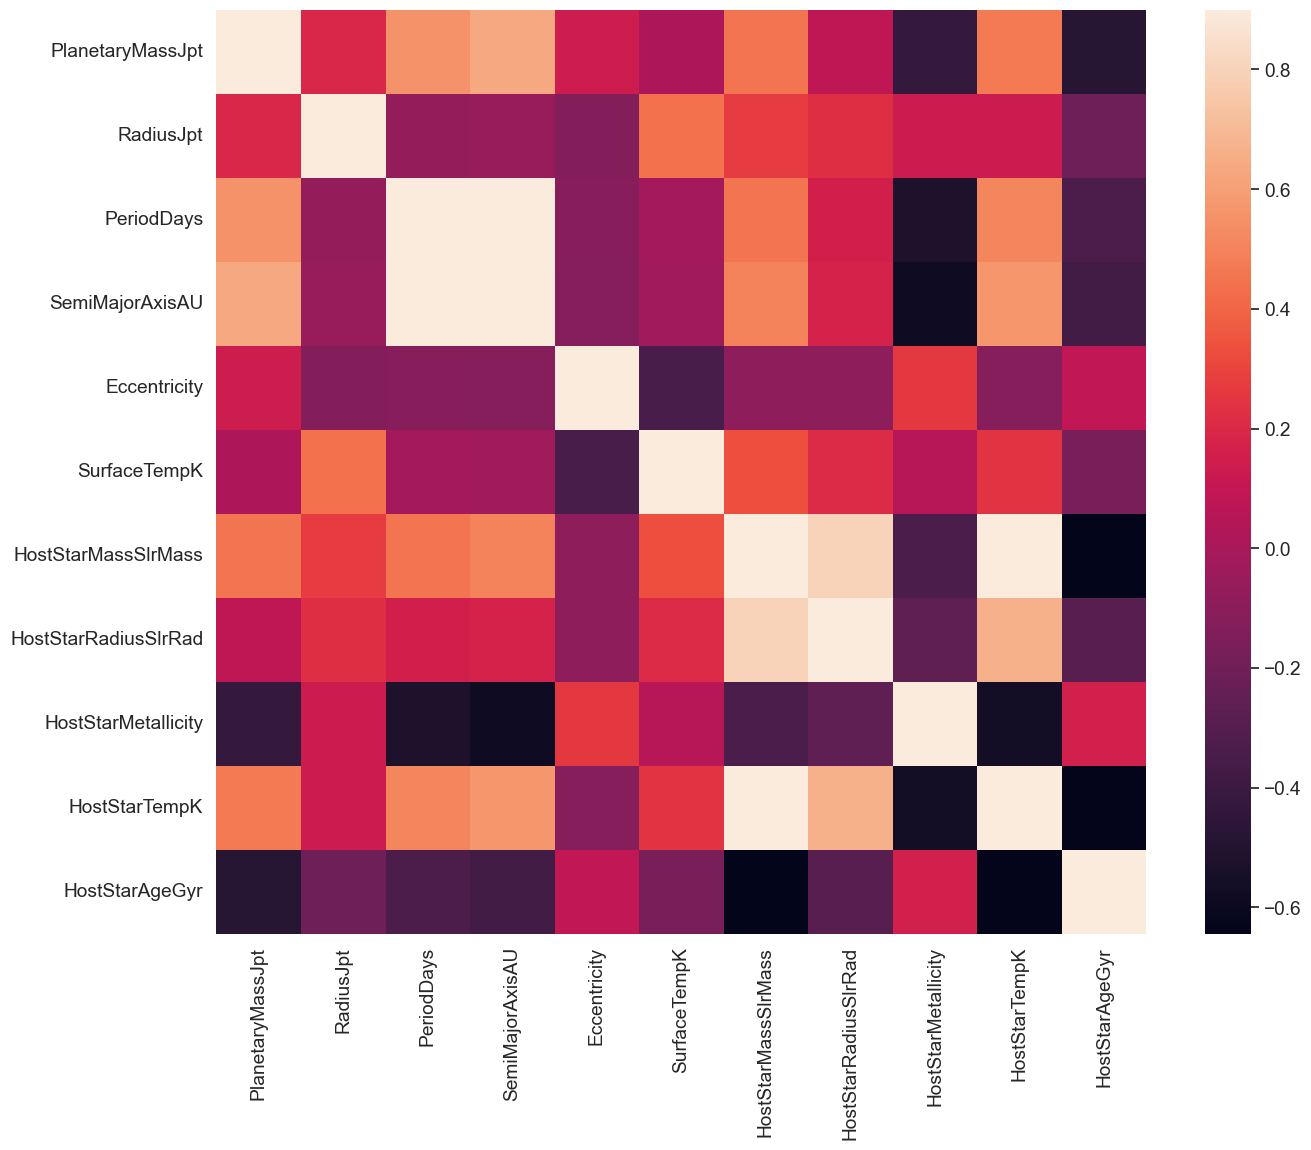

In [14]:
sns.set(rc={"figure.figsize": (15, 12)})
sns.set(font_scale=1.25)
sns.heatmap(corrmatrix,annot_kws={"size":29},fmt='d',vmax=0.9)
print("Here is a visualization (heat map or matrix) of the correlation matrix for these features:")

From the correlation matrix and corresponding heat matrix, we note the following **higher positive linear correlations** (~0.5 or higher) between pairs of features and whether they are expected or somewhat unexpected based on our prior knowledge of orbital mechanics, physics/astrophysics, planetary science, and the formation of solar systems:
* The planet's orbital period (**PeriodDays**) and its semi-major axis (**SemiMajorAxisAU**)  (expected)
* The host star's mass (**HostStarMassSlrMass**) and the host star's temperature (**HostStarTempK**) (expected)
* The host star's mass (**HostStarMassSlrMass**) and the host star's physical radius (**HostStarRadiusSlrRad**) (expected)
* The host star's temperature (**HostStarTempK**) and the host star's physical radius (**HostStarRadiusSlrRad**) (expected)
* The planetary mass (**PlanetaryMassJpt**) and the planetary semi-major axis (**SemiMajorAxisAU**) (expected)
* The planetary mass (**PlanetaryMassJpt**) and the planetary orbital period (**PeriodDays**) (expected)
* The planetary semi-major axis (**SemiMajorAxisAU**) and the host star temperature (**HostStarTempK**) (perhaps less expected or less obvious why this should be the case)
* The planetary orbital period (**PeriodDays**) and the host star temperature (**HostStarTempK**) (perhaps less expected or less obvious why this should be the case)

We also note the following **high negative linear correlations** (~-0.5 or lower) between pairs of features and whether they are expected or somewhat unexpected based on our prior knowledge of orbital mechanics, physics/astrophysics, planetary science, and the formation of solar systems:
* The host star's mass (**HostStarMassSlrMass**) and the host star's age (**HostStarAgeGyr**) (expected)
* The host star's metallicity (**HostStarMetallicity**) and the planet's semi-major axis (**SemiMajorAxisAU**) (perhaps less expected or less obvious why this should be the case)
* The host star's metallicity (**HostStarMetallicity**) and the planet's orbital periods (**PeriodDays**) (perhaps less expected or less obvious why this should be the case)
* The host star's metallicity (**HostStarMetallicity**) and the host star's temperature (**HostStarTempK**) (expected)
* The host star's temperature (**HostStarTempK**) and the host star's age (**HostStarAgeGyr**) (expected)

We can further examine the correlation of these features with histograms and scatter plots.

In [15]:
# First we examine the features with high positive linear correlations
selected_features1 = ['PeriodDays','SemiMajorAxisAU','HostStarMassSlrMass','HostStarTempK','HostStarRadiusSlrRad',
                     'PlanetaryMassJpt']
features1 = planetData[selected_features1].dropna()  # remove the NaN values
print("Number of observations: ", features1.shape[0])
features1.head()

Number of observations:  777


,PeriodDays,SemiMajorAxisAU,HostStarMassSlrMass,HostStarTempK,HostStarRadiusSlrRad,PlanetaryMassJpt
0,0.176891,0.0048,0.46,3584.0,0.45,0.0014
3,19.224180,0.1430,1.07,5777.0,1.02,0.2500
4,39.031060,0.2290,1.07,5777.0,1.02,0.1700
5,1.592851,0.0271,1.07,5777.0,1.02,0.0220
13,2.705782,0.0447,1.63,6490.0,2.18,1.2400


The sns.pairplot() function from Seaborn is a convenient tool to visualize the relationships between multiple variables in a DataFrame through a grid of pairwise plots (scatter plots, histograms, etc.). It is particularly useful for exploring potential correlations, distributions, and patterns in a dataset with multiple numerical or categorical variables.

Key features of sns.pairplot():
*  Pairwise Scatter Plots:

pairplot() plots each variable against every other variable as a scatter plot, allowing you to visually inspect how two variables relate to each other.
*  Diagonal Histograms or KDE Plots:

On the diagonal of the grid, it plots the distribution (histogram or kernel density estimation) of each variable. This helps to visualize the data distribution of individual variables.
*  Coloring by Category:

You can use a categorical variable to color-code the data points in the scatter plots, making it easier to differentiate between classes or groups in your data.
*  Insights into Multivariate Relationships:

It helps to quickly observe relationships and potential trends between multiple variables and also highlights which variables might be strongly or weakly correlated.

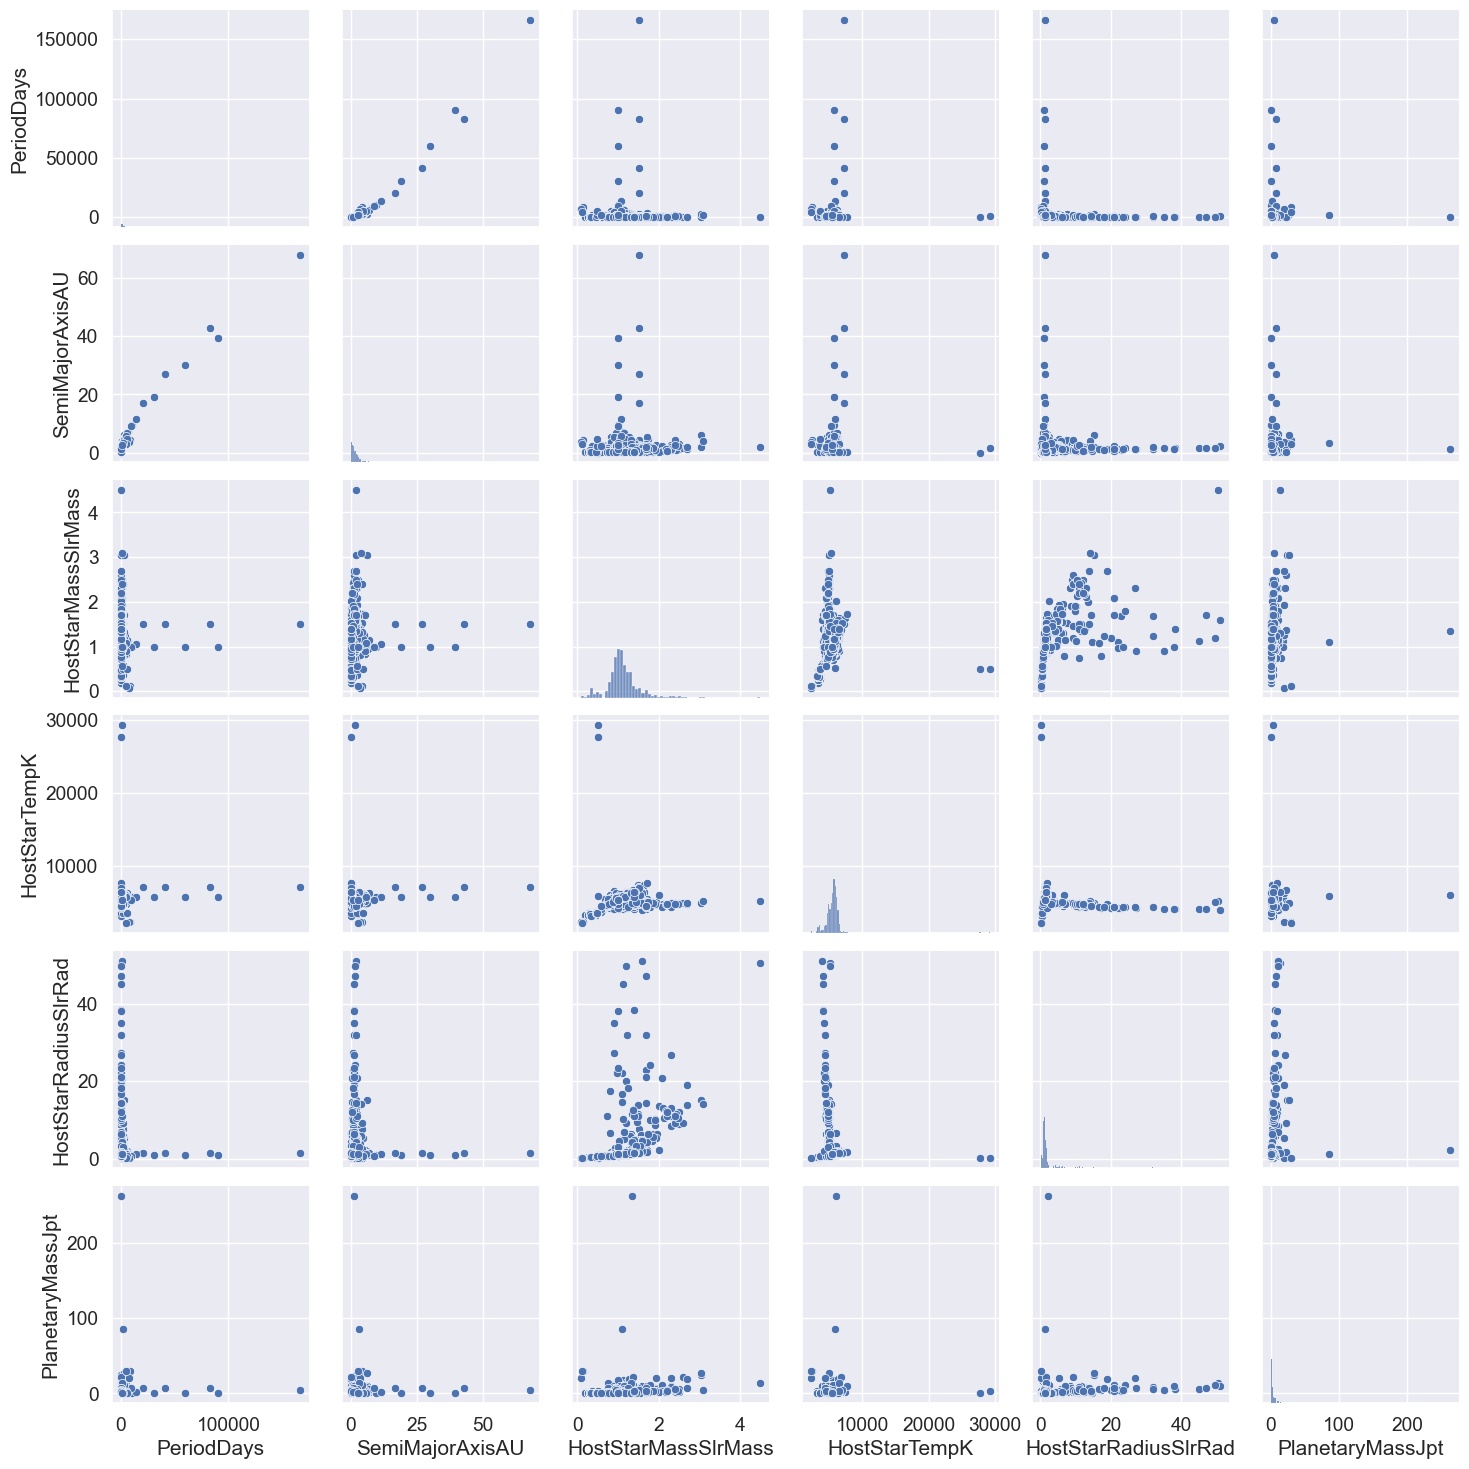

In [16]:
sns.pairplot(features1)

From the correlation matrix and the scatter plots above, we see that the two features with the largest positive correlation are the planetary orbital period and the semi-major axis of the orbit. We'll take a closer look at this:

In [17]:
selectedFeatures1=['SemiMajorAxisAU','PeriodDays']  # we make a list of the columns we want to examine further
planets_selectedFeatures1=planetData[selectedFeatures1].dropna() # remove the NaN values
planets_selectedFeatures1.head()

,SemiMajorAxisAU,PeriodDays
0,0.0048,0.176891
1,0.0390,4.194525
2,0.0520,6.356006
3,0.1430,19.224180
4,0.2290,39.031060


We add a new column 'PeriodYears' for the planetary orbital period (how long it takes for the planet to orbit its host star in years) to make it easier to compare with the Earth.

In [18]:
planets_selectedFeatures1['PeriodYears']=planets_selectedFeatures1['PeriodDays']/365.25
print("Number of observations: ", planets_selectedFeatures1.shape[0])
planets_selectedFeatures1.head()

Number of observations:  1236


,SemiMajorAxisAU,PeriodDays,PeriodYears
0,0.0048,0.176891,0.000484
1,0.0390,4.194525,0.011484
2,0.0520,6.356006,0.017402
3,0.1430,19.224180,0.052633
4,0.2290,39.031060,0.106861


# Simple Linear Regression Analysis of Semi-major Axis and Period

We can see what a simple **linear regression** on these two features by themselves looks like by plotting a regression line:

**kind='reg'**: This ensures that a regression line is included in the scatter plot between the two specified variables (SemiMajorAxisAU and PeriodYears).

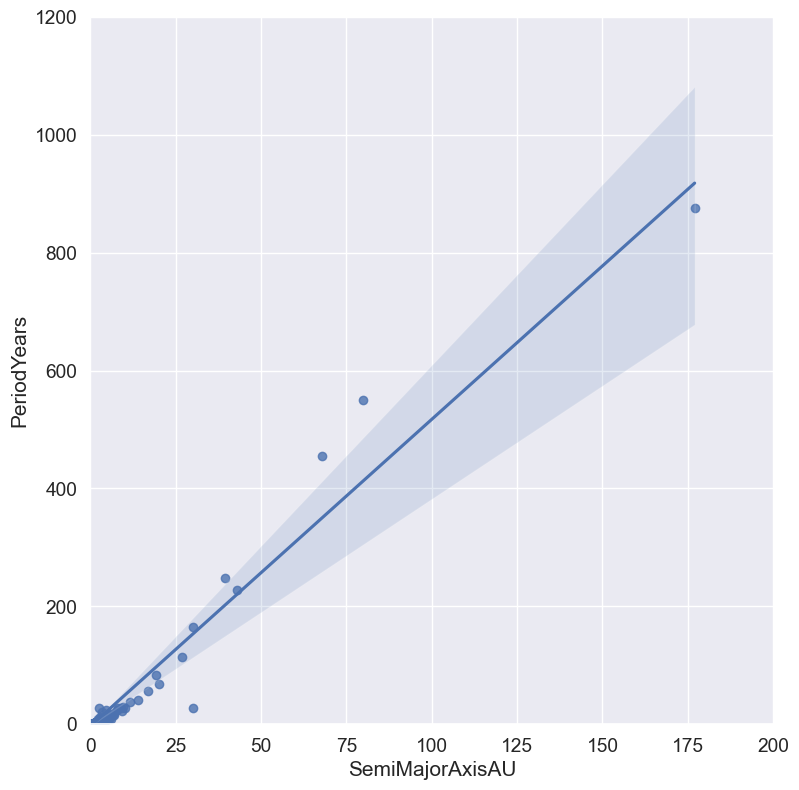

In [19]:
sns.pairplot(planets_selectedFeatures1, x_vars=['SemiMajorAxisAU'],y_vars='PeriodYears', size=8,
             kind='reg')
plt.xlim(0,200); # Seaborn now uses matplotlib.pyplot for setting plot limits.
plt.ylim(0,1200);

Let's blow up the portion of the plot where most of the observations lie (i.e., PeriodYears < 50 and SemiMajorAxisAU < 20):

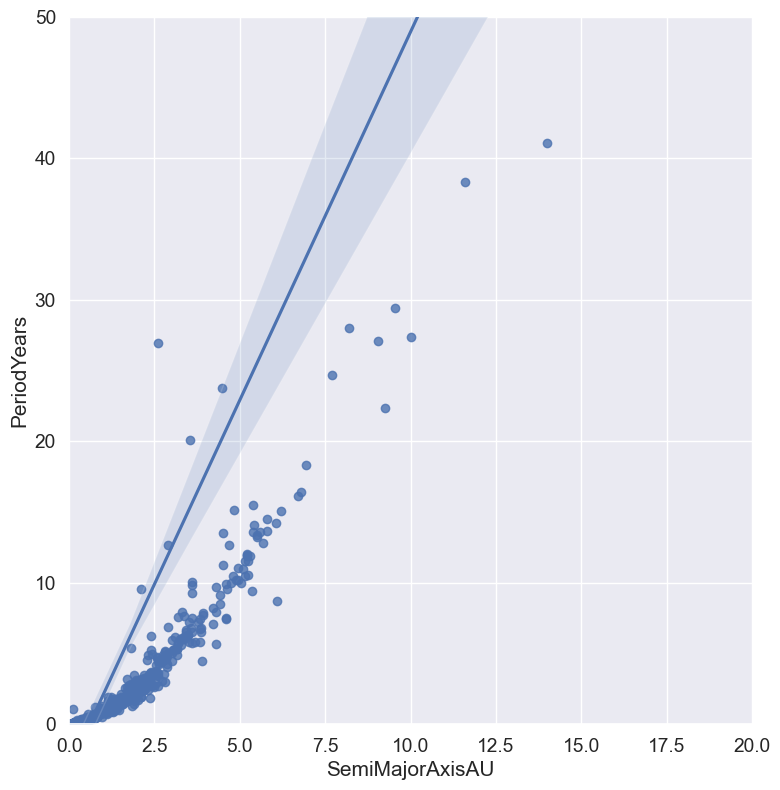

In [20]:
sns.pairplot(planets_selectedFeatures1, x_vars=['SemiMajorAxisAU'],y_vars='PeriodYears', size=8,
             kind='reg')
plt.xlim(0,20);
plt.ylim(0,50);

We can also obtain the pearson-r coefficient from a Seaborn jointplot. This jointplot shows the same bivariate scatterplot along with univariate histograms in the same figure.

The sns.jointplot() function from Seaborn is used to create a combination of scatter plots and distribution plots to visualize the relationship between two variables. It provides a quick way to inspect both the correlation between two variables and their individual distributions.

Key features of sns.jointplot():
Scatter Plot with Marginal Histograms or KDEs:

In the central plot, it shows a scatter plot (by default) to illustrate the relationship between two variables (e.g., X and Y).
On the margins (top for X, right for Y), it plots the distribution of each variable either as a histogram or a kernel density estimation (KDE).
Flexible Plot Types:

You can modify the central plot type and the marginal distribution plots.
Some of the commonly used kind options include:
*  kind='scatter' (default): A simple scatter plot in the center.
*  kind='kde': A bivariate kernel density estimate with contours.
*  kind='hex': A hexbin plot, useful for large datasets to reduce overplotting.
*  kind='reg': Adds a regression line to the scatter plot for showing the linear relationship.
*  kind='resid': Plots the residuals from a linear regression.
Enhanced Data Exploration:

By combining marginal distribution plots with the scatter plot, jointplot() allows you to simultaneously assess both the relationship and the individual distributions of the variables.

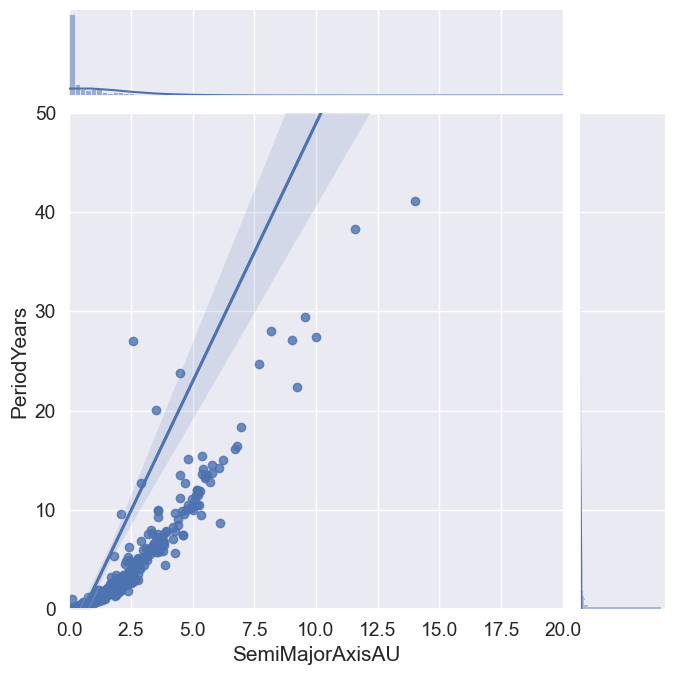

In [21]:
sns.jointplot(x='SemiMajorAxisAU', y='PeriodYears',data=planets_selectedFeatures1, kind="reg", height=7, xlim=(0,20), ylim=(0,50)) # size parameter is replaced with height


**The strong correlation between the planetary orbital period and the distance from the star is what we expect from Kepler's Third Law and Newton's Universal Law of Gravitation.**

If P is the period of the planetary orbit, measured in years, and a is the semimajor axis of the orbit, measured in Astronomical Units, then Kepler's and Newton's laws give the following relation:

P = K*a^(3/2), where K is a constant and approximately equal to (4*pi^2/G*M)^(3/2), where M is the mass of the host star and G is the gravitational constant (https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion).


Thus, we can see that the true relationship between P and a is not in fact linear. Nevertheless, let's further explore this with a scikit-learn simple linear regression model with 1 feature.



total data size: (1236, 1)
size of y: (1236, 1)
The y intercept: [-3.10586915]
The single coefficient: [[5.20371411]]
Variance score:  0.9479249281967272
RMSE for simple linear regression model (1 feature):  7.812646768379956

 This is a plot of y vs. y_pred


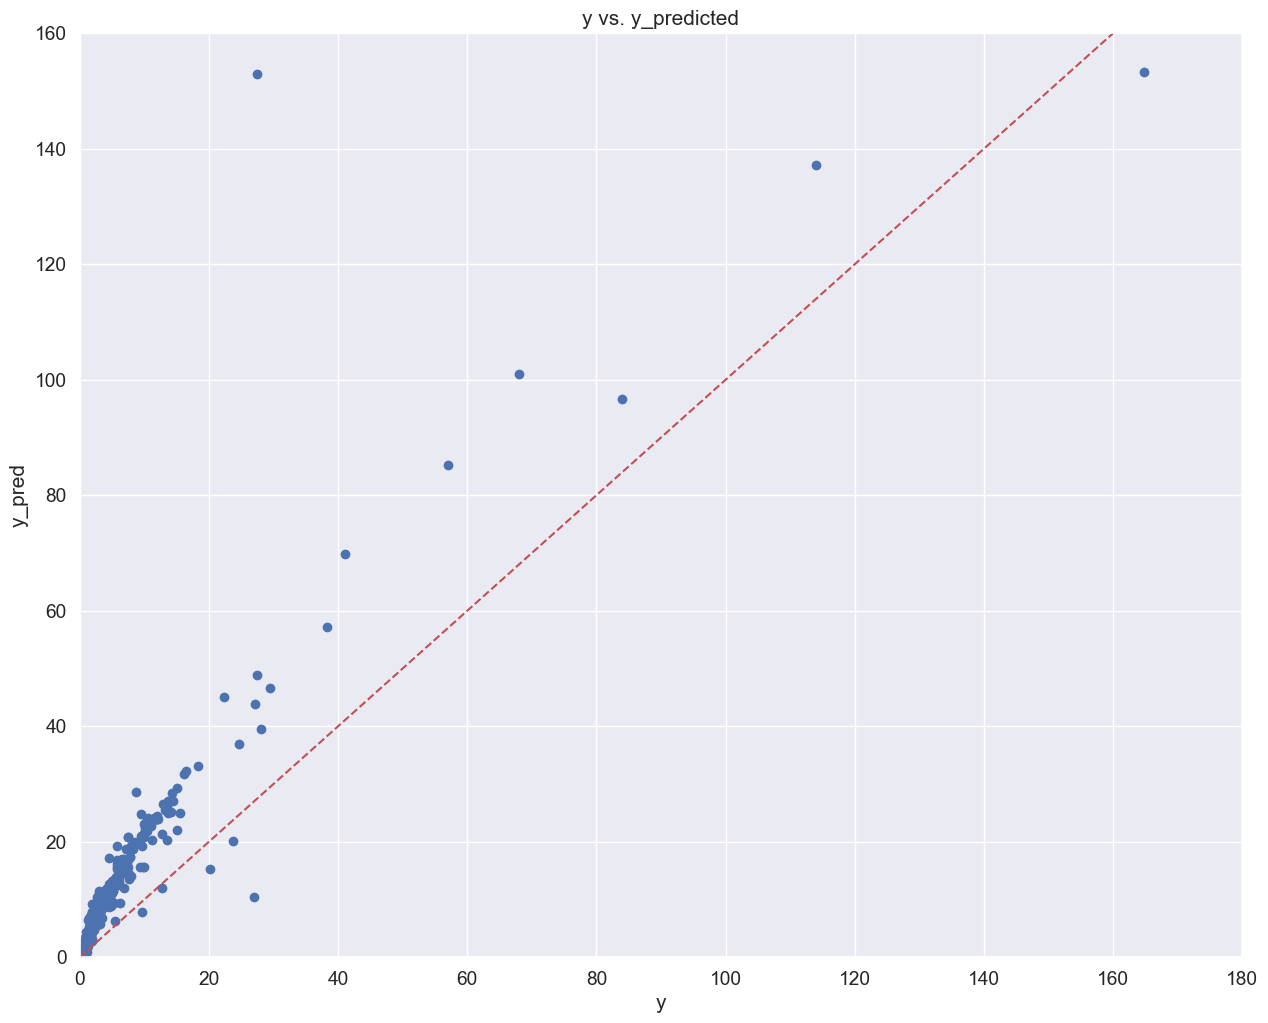

In [22]:
# Build a Model and create X and y:
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split # This module has been deprecated
from sklearn.model_selection import train_test_split # Use this module instead
from sklearn import metrics

X = planets_selectedFeatures1.SemiMajorAxisAU.values.reshape(1236,1) # We create a matrix X here that holds our feature. Use .values to return a NumPy representation of the Series
y = planets_selectedFeatures1.PeriodYears.values.reshape(1236,1)   # We create a vector y that holds our response variable. Use .values to return a NumPy representation of the Series

# Split arrays or matrices into random train and test subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print("training data size:",X_train.shape)
# print("testing data size:",X_test.shape)
print ("total data size:", X.shape)
print("size of y:", y.shape)
# print("size of y_train: ", y_train.shape)
# print("size of y_test: ", y_test.shape)

# Instantiate and fit
linreg = LinearRegression()
# linreg.fit(X_train, y_train)
linreg.fit(X, y)

# print the coefficients
print("The y intercept:", linreg.intercept_)
print("The single coefficient:", linreg.coef_)

# Predict the model
# y_pred=linreg.predict(X_test)
# print(y_pred.shape)
y_pred=linreg.predict(X)

# Get a Score
# print(linreg.score(X_test,y_test))
print("Variance score: ", linreg.score(X,y))

print("RMSE for simple linear regression model (1 feature): ",np.sqrt(metrics.mean_squared_error(y, y_pred)))


# Plot y vs y_pred

print("\n This is a plot of y vs. y_pred")
plt.scatter(y, y_pred)
plt.plot([0,1000],[0,1000], 'r--')
plt.xlim(0,180);
plt.ylim(0,160);
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('y vs. y_predicted');

Text(0, 0.5, 'PeriodYears')

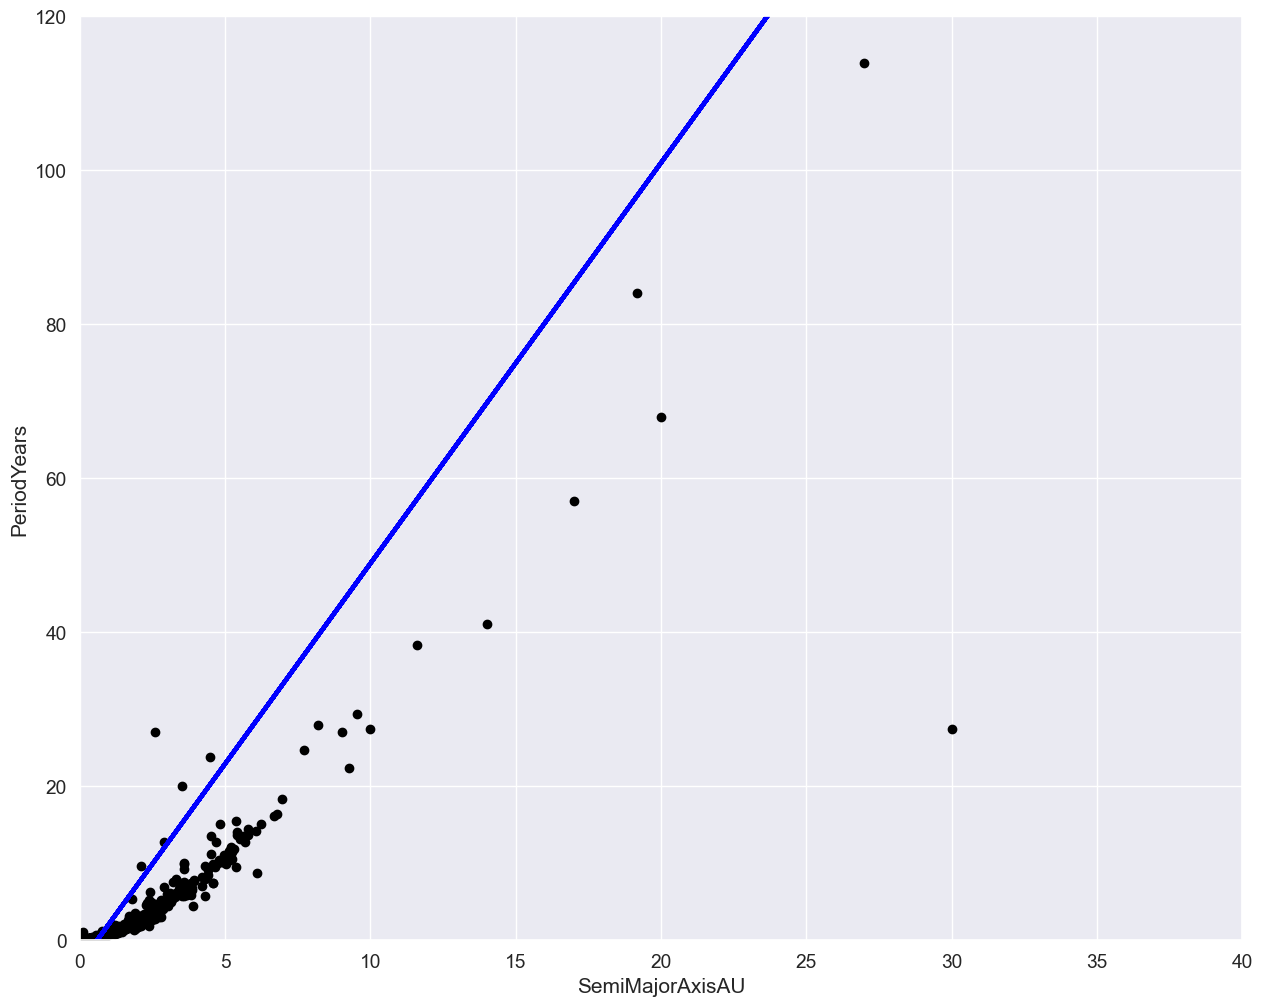

In [23]:
# More plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue',
         linewidth=3)

plt.xlim(0,40);
plt.ylim(0,120);
plt.xlabel('SemiMajorAxisAU')
plt.ylabel('PeriodYears')

**The straight line in the plot above shows how the linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.**

We also examine the **residuals**, i.e., the difference between the PeriodYears observations (y) and the predicted values of PeriodYears (y_pred):



Text(0, 0.5, 'residuals')

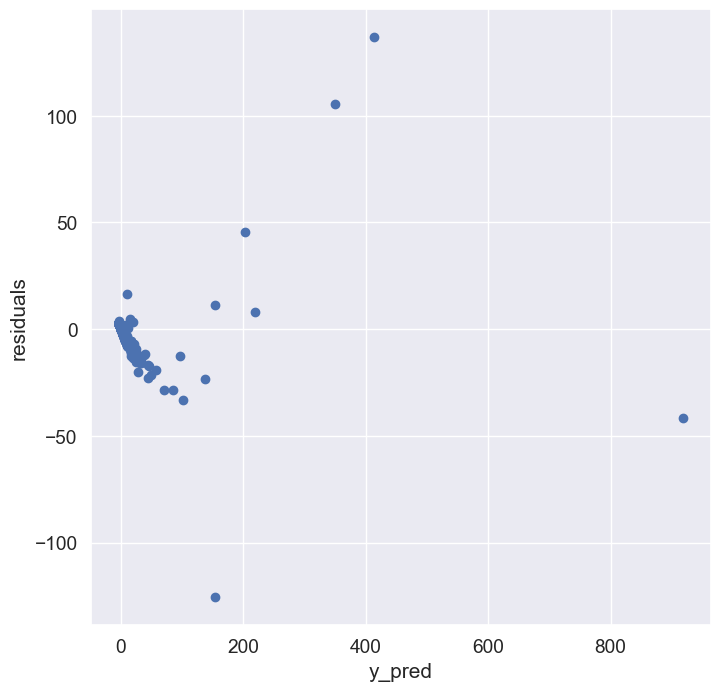

In [24]:
residuals = y - y_pred
plt.figure(figsize=(8, 8))
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred',fontsize=15)
plt.ylabel('residuals', fontsize=15)

### Using the model for prediction
Now that we've got a fitted linear regression model we can try to make a prediction with the model. Let's say that there was a new observation of an exoplanet that had a SemiMajorAxisAU of 5.2. What would we predict the orbital period in years of that planet for this model to be?

$$y = \beta_0 + \beta_1 x$$
$$y = -3.105 + 5.203 \times 5.2$$

In [25]:
# Manually calculate it and confirm with the plots we created above. Does this value make sense?
-3.105 + 5.203 * 5.2

23.9506

We can also use our linear regression model to make this same prediction:

In [26]:
# predict for a new observation, here the semi-major axis is 5.2 AU
print(linreg.predict([[5.2]])) # Changed from 5.2 to [[5.2]] to make it a 2D array

[[23.95344422]]


So, we would predict a Period of 23.95 years for a model with a semi-major axis of 5.2 AU.

We can also confirm the R-squared value for our simple linear model using scikit-learn's prebuilt R-squared scorer:

In [27]:
metrics.r2_score(y, y_pred)

# This is a way to measure how good of a model this is. This is the Pearson R
# coefficient and it indicates how closely our best-fit line explains the variation
# of the data. An R-squared score closer to 1 is always better.

0.9479249281967272

# Multiple Linear Regression Analysis involving Semi-major Axis, Period, Planetary Mass, Planetary Radius, and Host Star Temperature

Of course, we know that the theoretical relationship (Kepler's and Newton's laws) between the planet's orbital period and semi-major axis also involves the mass of the host star as well, so a better linear regression model would need to include the star's mass as an additional feature as well. Also, from our knowledge of our own solar system and from our knowledge of planetary system formation theories, we note that larger and more massive gas giant planets often form and orbit their host stars at greater distances than the smaller terrestrial (Earth-like) planets. This suggests that it might be interesting to construct a more complex multiple linear regression model involving semi-major axis, planetary mass, planetary radius, host star temperature, and stellar metallicity (given that there was a higher than expected correlation between host star temperature, metalliciy, and orbital period) as features and the planetary orbital period as the target variable.

First, we'll take a closer look at the relationship between the planetary mass and the distance of the planet from the host star.

In [28]:
selectedFeatures2=['SemiMajorAxisAU','PlanetaryMassJpt']  # we make a list of the columns we want to examine further
planets_selectedFeatures2=planetData[selectedFeatures2].dropna() # remove the NaN values
print("Number of observations: ", planets_selectedFeatures2.shape[0])
planets_selectedFeatures2.head()

Number of observations:  1067


,SemiMajorAxisAU,PlanetaryMassJpt
0,0.0048,0.0014
3,0.1430,0.2500
4,0.2290,0.1700
5,0.0271,0.0220
6,0.0530,0.0321


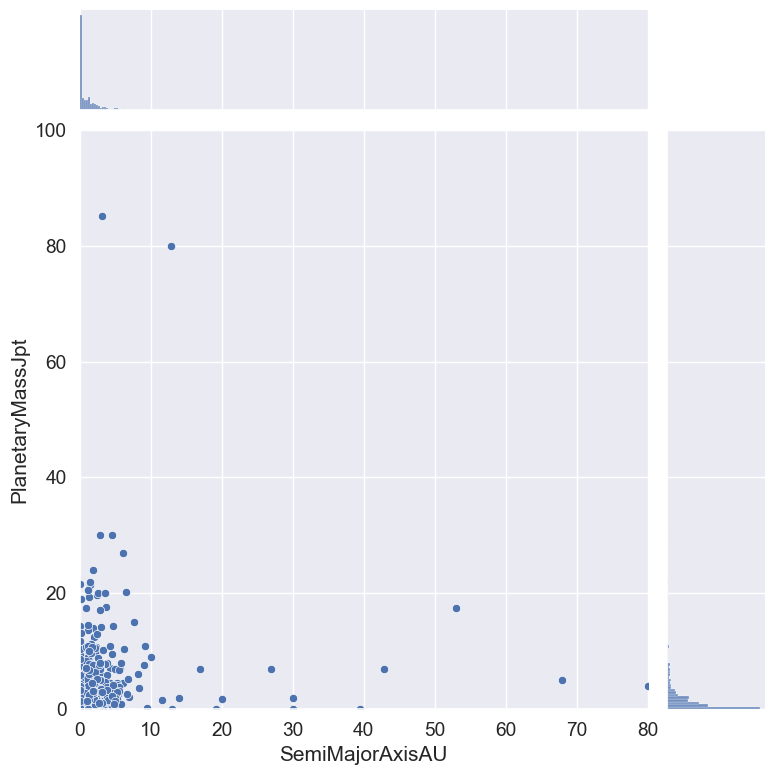

In [29]:
sns.jointplot(x="SemiMajorAxisAU", y="PlanetaryMassJpt",xlim =(0,80), ylim=(0,100), data=planets_selectedFeatures2,
              height=8)

We focus on the portion of the plot where most of the data points lie by blowing up this part of the plot. We'll also check to see what a simple linear regression on these two features by themselves looks like by plotting a regression line:

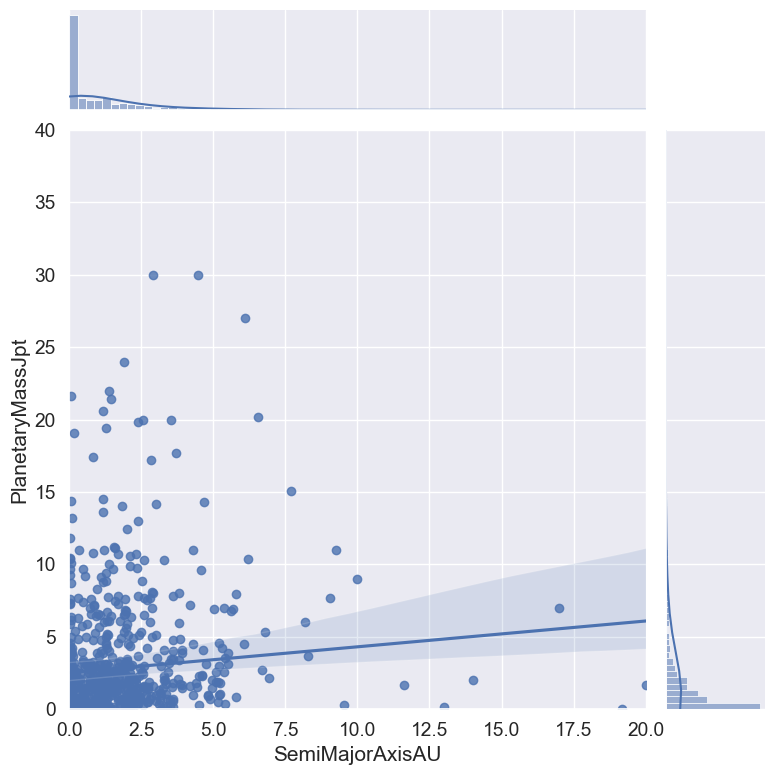

In [30]:
sns.jointplot(x="SemiMajorAxisAU", y="PlanetaryMassJpt",xlim =(0,20), ylim=(0,40), data=planets_selectedFeatures2,
              height=8, kind='reg')

Though we found there to be a somewhat high correlation value between the planetary mass and its distance from the host star (0.636961), it seems somewhat difficult to see this relationship between these two variables in this plot.

Let's construct a more complex multiple linear regression model involving semi-major axis, planetary mass, planetary radius, host star temperature, and stellar metallicity (given that there was a higher than expected correlation between host star temperature, metalliciy, and orbital period) as features, and the planetary orbital period as the target variable.

In [31]:
# create X and y
mult_cols = ['SemiMajorAxisAU','HostStarMassSlrMass','HostStarTempK', 'RadiusJpt', 'HostStarMetallicity',
             'PlanetaryMassJpt','PeriodYears']   # take X to be 6 columns and y to be 1 column
mult_features = ['SemiMajorAxisAU','HostStarMassSlrMass','HostStarTempK', 'RadiusJpt', 'HostStarMetallicity',
             'PlanetaryMassJpt']
planetData['PeriodYears']=planetData['PeriodDays']/365.25
planets_selectedFeatures = planetData[mult_cols].dropna()


X_mult = planets_selectedFeatures[mult_features]
# y_mult = planetData.PeriodYears.dropna()
y_mult = planets_selectedFeatures['PeriodYears']   # y is the PeriodYears column
print("Number of observations: ", X_mult.shape[0])
print("Number of values for the response variable y: ", y_mult.shape[0])
print(X_mult.shape)
print(y_mult.shape)
print(X_mult.head())
print(y_mult.head())

# instantiate and fit like last time
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_   # this is the y-intercept, beta_0
# print the coefficients
print(intercept) # this is beta_0
print(coeffs)   # we print out 6 coefficients: beta_1, beta_2, beta_3, beta_4, beta_5, beta_6


Number of observations:  327
Number of values for the response variable y:  327
(327, 6)
(327,)
   SemiMajorAxisAU  HostStarMassSlrMass  HostStarTempK  RadiusJpt  \
0           0.0048                 0.46         3584.0      0.054   
3           0.1430                 1.07         5777.0      0.840   
4           0.2290                 1.07         5777.0      0.820   
5           0.0271                 1.07         5777.0      0.147   
8           0.0449                 1.07         6050.0      1.240   

   HostStarMetallicity  PlanetaryMassJpt  
0                 0.00            0.0014  
3                 0.12            0.2500  
4                 0.12            0.1700  
5                 0.12            0.0220  
8                -0.02            0.6000  
0    0.000484
3    0.052633
4    0.106861
5    0.004361
8    0.009234
Name: PeriodYears, dtype: float64
2.9020032237310955
[ 5.99839945e+00 -7.03858397e-01 -7.88095023e-04  1.46387169e+00
  3.14976539e+00 -2.02004385e-01]



In Python, **zip()** is a built-in function that combines multiple iterables (like lists, tuples, etc.) into a single iterator of tuples. Each tuple contains elements from the corresponding position of each iterable, effectively "zipping" them together. It’s useful for pairing elements from multiple sequences together for processing.

How **zip()** works:
Zips corresponding elements: It pairs the first element of each iterable together, then the second elements, and so on.
Stops at the shortest iterable: If the iterables passed to zip() are of unequal lengths, zip() stops creating pairs when the shortest iterable is exhausted.

In [32]:
# pair the feature names with the coefficients
zip(mult_features, multiple_linreg.coef_) # pairs items together from 2 columns, etc. (review this)
list(zip(mult_features, multiple_linreg.coef_))    # this works here too
# Gives us nice output including the coefficient name. Note that 'zip' "pairs" up the elements of a number of lists,
# tuples, or other sequences, to create a list tuples. 'zip' can take an arbitrary number of sequences, and the
# number of elements it produces is determined by the shortest sequence.

[('SemiMajorAxisAU', 5.998399449547664),
 ('HostStarMassSlrMass', -0.7038583967660809),
 ('HostStarTempK', -0.0007880950228716119),
 ('RadiusJpt', 1.4638716926356323),
 ('HostStarMetallicity', 3.1497653914846144),
 ('PlanetaryMassJpt', -0.20200438479652497)]

We check to see if this model has a better R<sup>2</sup> and RMSE value than the previous simple linear regression model.

In [33]:
y_mult_pred = multiple_linreg.predict(X_mult)
print("R^2 value: ", metrics.r2_score(y_mult, y_mult_pred))
# print("Variance score: ", linreg.score(X_mult,y_mult)
print("RMSE for multiple linear regression model (6 features): ",np.sqrt(metrics.mean_squared_error(y_mult, y_mult_pred)))

R^2 value:  0.9741272025161944
RMSE for multiple linear regression model (6 features):  5.3862914143643215



 This is a blown-up plot of y_mult vs. y_mult_pred


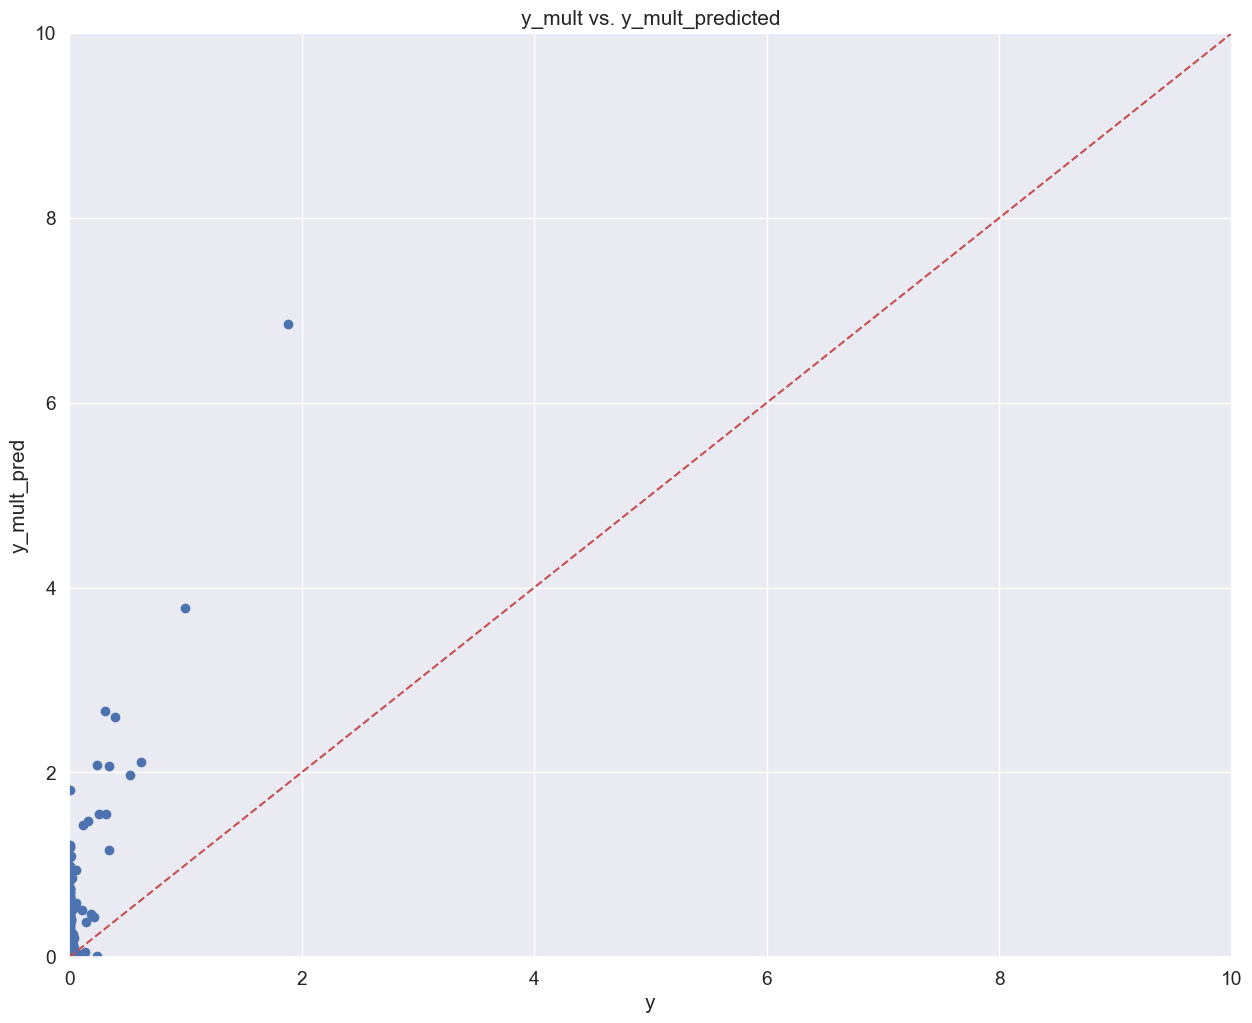

In [34]:
# Plot y vs y_pred

print("\n This is a blown-up plot of y_mult vs. y_mult_pred")
plt.scatter(y_mult, y_mult_pred)
plt.plot([0,10],[0,10], 'r--')
plt.xlim(0,10);
plt.ylim(0,10);
plt.xlabel('y')
plt.ylabel('y_mult_pred')
plt.title('y_mult vs. y_mult_predicted');

Text(0, 0.5, 'residuals')

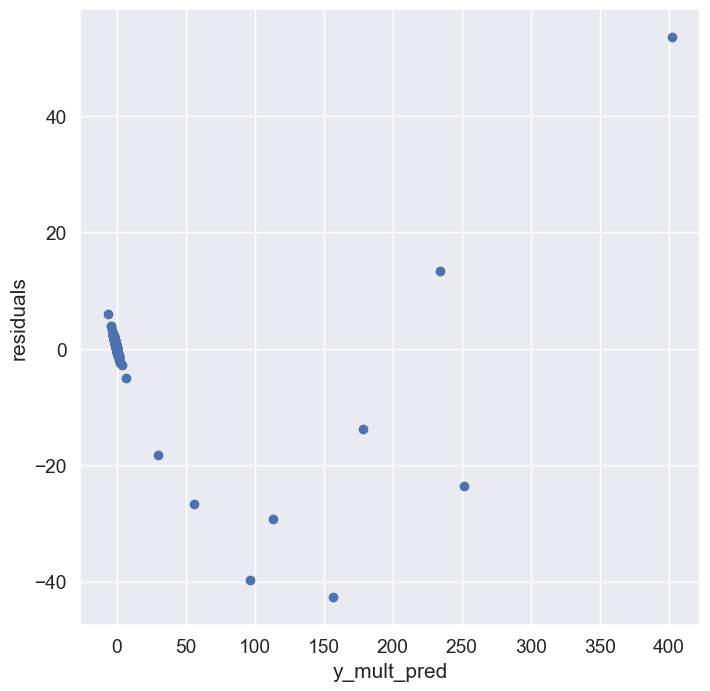

In [35]:
residuals = y_mult - y_mult_pred
plt.figure(figsize=(8, 8))
plt.scatter(y_mult_pred,residuals)
plt.xlabel('y_mult_pred',fontsize=15)
plt.ylabel('residuals', fontsize=15)

One of the problems with this model is that we have relatively few observations (327) due to the fact that many of the features have so many NaNs. Before proceeding forward, it might be a good idea to choose only those features with the fewest NaNs. This will mean that our model has fewer features but more observations. This might also better enable us to use train/test split for model evaluation.

Number of observations:  980
Number of values for the response variable y:  980
training data size: (686, 3)
testing data size: (294, 3)
total data size: (980, 3)
size of y_mult: (980,)
size of y_mult_train:  (686,)
size of y_mult_test:  (294,)
(294,)
-2.3227915486023116
[ 5.80353945 -1.70330141 -0.0292543 ]
Variance Score:  -1.5471504459513277
R^2 value:  -1.5471504459513277
RMSE for multiple linear regression model (3 features):  5.215574023104916

 This is a blown-up plot of y_mult_test vs. y_mult_pred


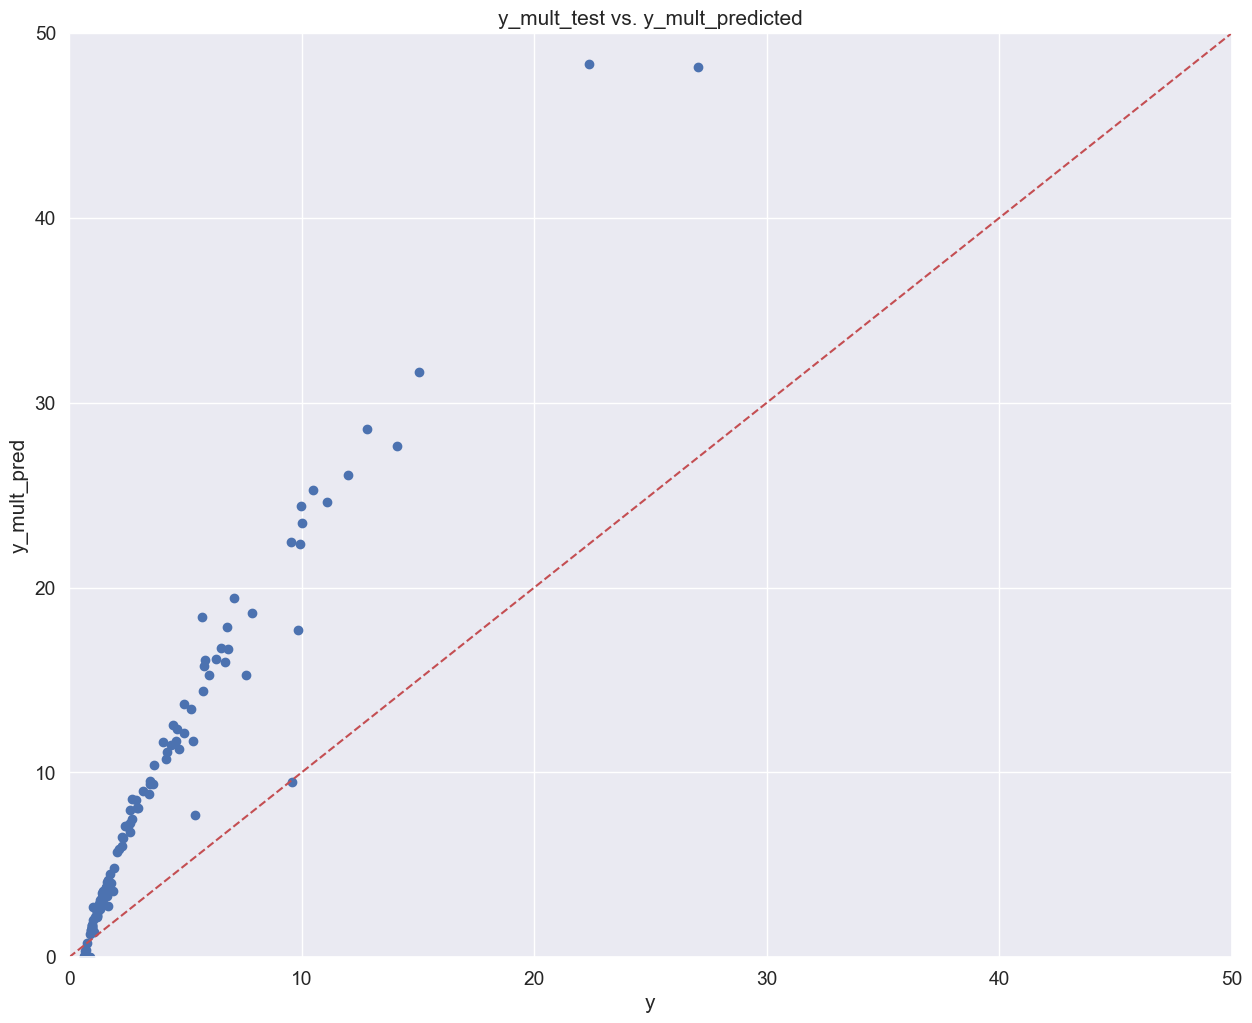

In [36]:
mult_cols = ['SemiMajorAxisAU','HostStarMassSlrMass',
             'PlanetaryMassJpt','PeriodYears']   # take X to be 6 columns and y to be 1 column
mult_features = ['SemiMajorAxisAU','HostStarMassSlrMass', 'PlanetaryMassJpt']
# planetData['PeriodYears']=planetData['PeriodDays']/365.25
planets_selectedFeatures = planetData[mult_cols].dropna()


X_mult = planets_selectedFeatures[mult_features]
# y_mult = planetData.PeriodYears.dropna()
y_mult = planets_selectedFeatures['PeriodYears']   # y is the PeriodYears column
print("Number of observations: ", X_mult.shape[0])
print("Number of values for the response variable y: ", y_mult.shape[0])


X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y_mult, test_size=0.3, random_state=42)
# Split arrays or matrices into random train and test subsets
# -- use random state for debugging purposes
print("training data size:",X_mult_train.shape)
print("testing data size:",X_mult_test.shape)
print ("total data size:", X_mult.shape)
print("size of y_mult:", y_mult.shape)
print("size of y_mult_train: ", y_mult_train.shape)
print("size of y_mult_test: ", y_mult_test.shape)


# instantiate and fit like last time

mult_linreg = LinearRegression()

# fit the model
mult_linreg.fit(X_mult_train, y_mult_train)

# Predict the model
y_mult_pred=mult_linreg.predict(X_mult_test)
print(y_mult_pred.shape)
coeffs = mult_linreg.coef_
intercept =  mult_linreg.intercept_   # this is the y-intercept, beta_0

# print the coefficients
print(intercept) # this is beta_0
print(coeffs)   # we print out 6 coefficients: beta_1, beta_2, beta_3, beta_4, beta_5, beta_6


# Get a Score

print("Variance Score: ", mult_linreg.score(X_mult_test,y_mult_test))
print("R^2 value: ", metrics.r2_score(y_mult_test, y_mult_pred))
print("RMSE for multiple linear regression model (3 features): ",np.sqrt(metrics.mean_squared_error(y_mult_test, y_mult_pred)))

# Plot y vs y_pred

print("\n This is a blown-up plot of y_mult_test vs. y_mult_pred")
plt.scatter(y_mult_test, y_mult_pred)
plt.plot([0,50],[0,50], 'r--')
plt.xlim(0,50);
plt.ylim(0,50);
plt.xlabel('y')
plt.ylabel('y_mult_pred')
plt.title('y_mult_test vs. y_mult_predicted');

Text(0, 0.5, 'PeriodYears')

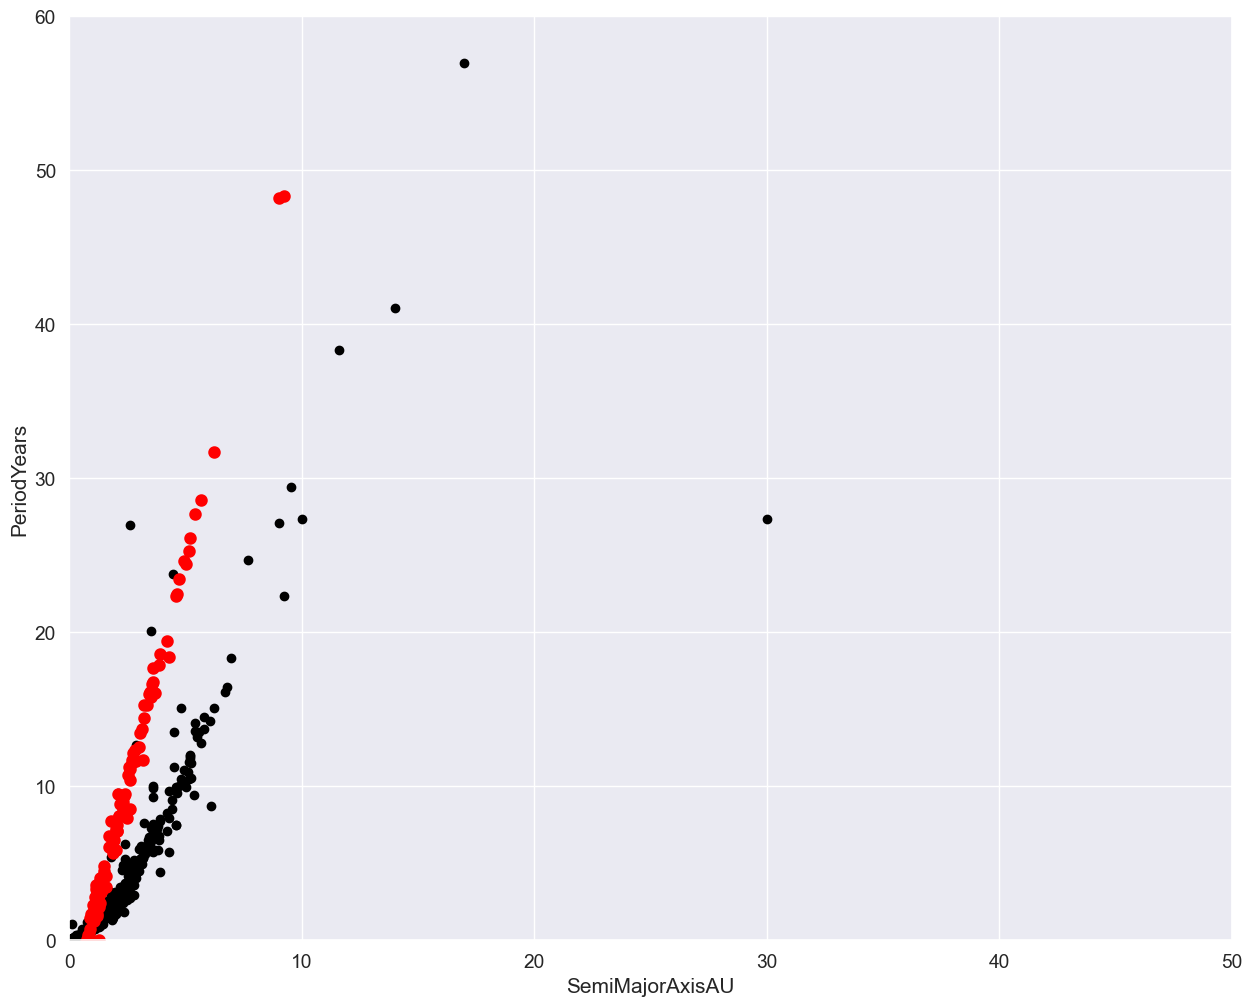

In [37]:
# More plot outputs
plt.scatter(X_mult.SemiMajorAxisAU, y_mult,  color='black')
plt.scatter(X_mult_test.SemiMajorAxisAU, y_mult_pred, color='red',
         linewidth=3)

plt.xlim(0,50);
plt.ylim(0,60);
plt.xlabel('SemiMajorAxisAU')
plt.ylabel('PeriodYears')

# Ridge and Lasso Regression
Apply Ridge and Lasso regression to control overfitting through regularization.

**Activity:**

*   Train a Ridge and Lasso regression model using the dataset.
Compare the effects of the regularization parameter
𝛼 on model performance. Check .coef_
*   Which regularization method would be preferred for a dataset with many irrelevant features, and why?



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def ridge_lasso_regression(X_mult_train, y_mult_train, X_mult_test, y_mult_test, alpha_values):
    for alpha in alpha_values:
        print(f"\nAlpha: {alpha}")
        
        # Ridge Regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_mult_train, y_mult_train)
        y_pred_ridge = ridge.predict(X_mult_test)
        mse_ridge = mean_squared_error(y_mult_test, y_pred_ridge)
        print(f"Ridge Regression MSE: {mse_ridge}")
        print(f"Ridge Coefficients: {ridge.coef_}")
        
        # Lasso Regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_mult_train, y_mult_train)
        y_pred_lasso = lasso.predict(X_mult_test)
        mse_lasso = mean_squared_error(y_mult_test, y_pred_lasso)
        print(f"Lasso Regression MSE: {mse_lasso}")
        print(f"Lasso Coefficients: {lasso.coef_}")

# List of alpha values to test for regularization strength
alpha_values = [0.01, 0.1, 1, 10]

# Apply the regression models and compare performance
ridge_lasso_regression(X_mult_train, y_mult_train, X_mult_test, y_mult_test, alpha_values)


Alpha: 0.01
Ridge Regression MSE: 27.202219291507664
Ridge Coefficients: [ 5.80353526 -1.70316536 -0.02925485]
Lasso Regression MSE: 27.219040221168594
Lasso Coefficients: [ 5.80275617 -1.64970536 -0.02941946]

Alpha: 0.1
Ridge Regression MSE: 27.20228123964366
Ridge Coefficients: [ 5.80349759 -1.70194183 -0.02925982]
Lasso Regression MSE: 27.40363693051672
Lasso Coefficients: [ 5.79570366 -1.16734102 -0.03090584]

Alpha: 1
Ridge Regression MSE: 27.202884740461133
Ridge Coefficients: [ 5.80312163 -1.68980016 -0.02930907]
Lasso Regression MSE: 27.785869487602127
Lasso Coefficients: [ 5.7528588  -0.         -0.02976472]

Alpha: 10
Ridge Regression MSE: 27.20729897295582
Ridge Coefficients: [ 5.79942971 -1.57707056 -0.02976355]
Lasso Regression MSE: 23.430969752727744
Lasso Coefficients: [ 5.4152144 -0.        -0.       ]


# Polynomial Regression and Overfitting

Understand how increasing model complexity can lead to overfitting.

Activity:
*  Create polynomial features to fit higher-degree models and analyze overfitting.
*  Compare the training and test errors for different polynomial degrees. What do you observe about overfitting?

Degree 1:
Training Error (MSE): 70.75469635089522
Test Error (MSE): 22.561409307516037
Degree 2:
Training Error (MSE): 70.3425235067947
Test Error (MSE): 25.62741141965775
Degree 3:
Training Error (MSE): 16.07087848212387
Test Error (MSE): 1.5993560362694974
Degree 4:
Training Error (MSE): 16.03729770155772
Test Error (MSE): 1.5218890790903337
Degree 5:
Training Error (MSE): 15.433687639381384
Test Error (MSE): 2.6686867101309435
Degree 6:
Training Error (MSE): 15.366240769142527
Test Error (MSE): 3.7079867333445207


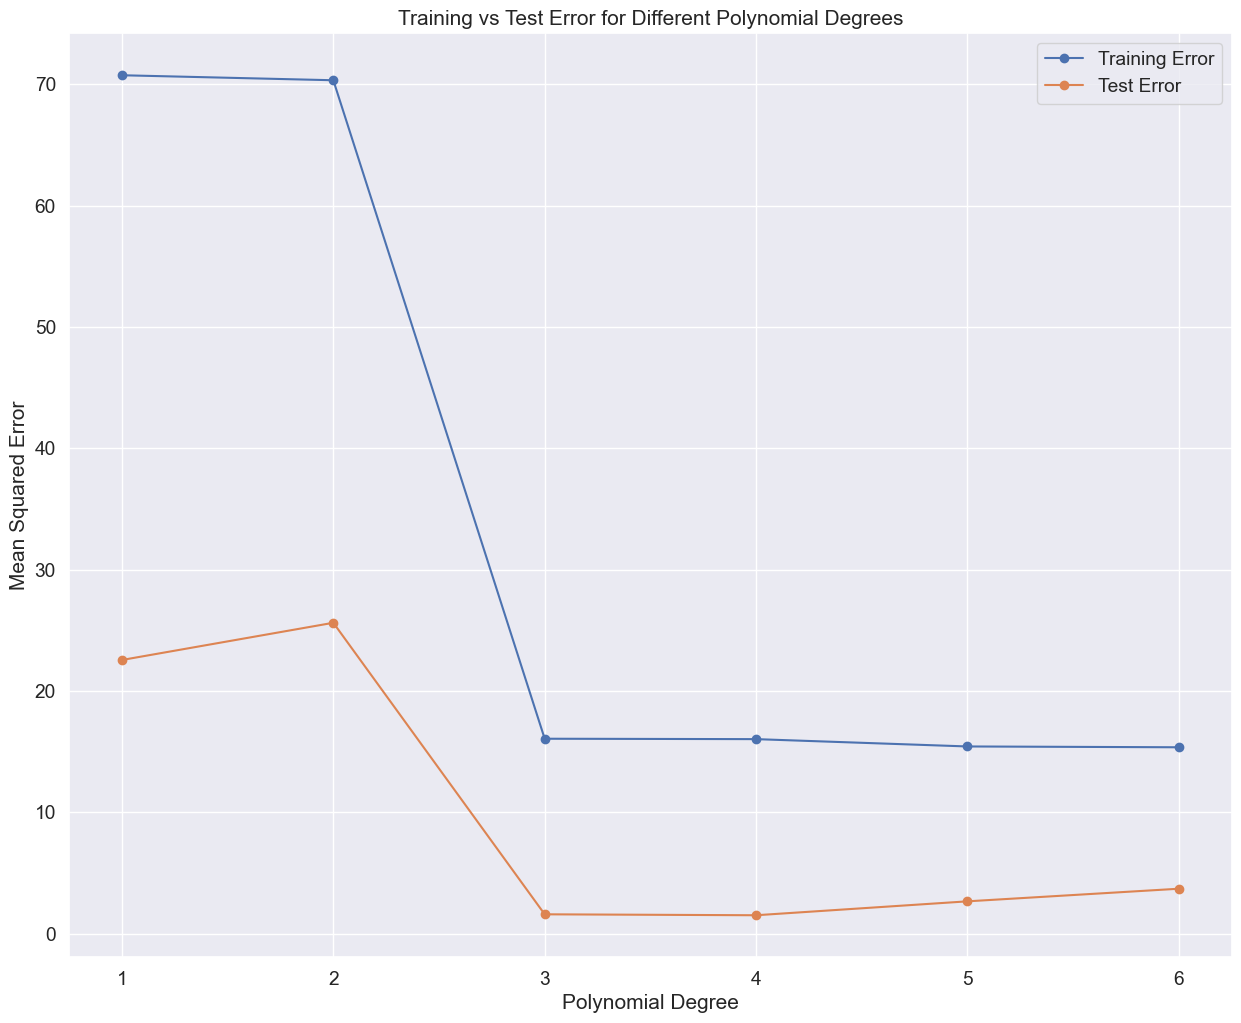

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Split the dataset into training and test sets
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to apply polynomial regression and analyze overfitting
def polynomial_regression(X_mult_train, y_mult_train, X_mult_test, y_mult_test, degrees):
    train_errors = []
    test_errors = []
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_mult_train)
        X_test_poly = poly.transform(X_mult_test)
        
        # Train the linear regression model on the polynomial features
        model = LinearRegression()
        model.fit(X_train_poly, y_mult_train)
        
        # Predict on the training and test sets
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calculate mean squared errors for training and test sets
        mse_train = mean_squared_error(y_mult_train, y_train_pred)
        mse_test = mean_squared_error(y_mult_test, y_test_pred)
        
        train_errors.append(mse_train)
        test_errors.append(mse_test)
        
        # Print the training and test errors for each degree
        print(f"Degree {degree}:")
        print(f"Training Error (MSE): {mse_train}")
        print(f"Test Error (MSE): {mse_test}")
    
    # Plot the training and test errors
    plt.plot(degrees, train_errors, label="Training Error", marker='o')
    plt.plot(degrees, test_errors, label="Test Error", marker='o')
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Mean Squared Error")
    plt.title("Training vs Test Error for Different Polynomial Degrees")
    plt.legend()
    plt.show()

# List of polynomial degrees to test
degrees = [1, 2, 3, 4, 5, 6]

# Apply the polynomial regression and compare training and test errors
polynomial_regression(X_mult_train, y_mult_train, X_mult_test, y_mult_test, degrees)

# Cross-Validation for Model Selection
Use cross-validation to evaluate and select the best-performing model.

Activity:
Perform k-fold cross-validation on a linear regression model.

In [42]:
from sklearn.model_selection import cross_val_score, KFold


# Initialize the Linear Regression model
model = LinearRegression()

# Define k for k-fold cross-validation
k = 100  # For example, using 5-fold cross-validation

# Define the k-fold cross-validation strategy
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and compute the scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE values to positive by taking the absolute value
cv_mse_scores = -cv_scores

# Print the MSE for each fold and the average MSE
print(f"MSE for each fold: {cv_mse_scores}")
print(f"Average MSE: {np.mean(cv_mse_scores)}")

MSE for each fold: [  30.26722703    8.96630562   38.52134336   22.20884054    9.64455056
    6.07780402    9.90646569   21.49657223   17.13293748   11.30535465
   13.97430898    6.5798729    27.43140203   17.1753662    29.19346602
    8.59549358   29.29302142   95.52703235   10.56756859   17.5104643
    7.17899568    7.12243976   23.48082813   53.15828361   29.98698393
   23.37629459   11.05412404   10.96647718   10.19353864   12.6766105
    5.63930883   38.63084143   25.26213811   18.76446438   10.86546763
 1876.15330011    9.47112956   77.08611312    9.88438442   14.67205822
    9.5377803    27.39500793   23.17284996   10.96796115   31.08640006
   49.03279082    5.18137874   15.08580653   59.58930756   11.39305431
   40.68097124   64.91422488  967.5725794     8.07773471    4.91887655
    7.05389282    6.61383006 1383.53569377   34.09644572   16.15662065
   22.91385583    6.56411674    8.70089532   12.1848746    15.60329539
   20.41738252    8.23143421    7.5162755     7.933063     1